In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [6]:
from sklearn import tree

In [7]:
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("/content/dataset_phishing.csv")

In [9]:
print(data.head())

                                                 url  length_url  \
0              http://www.crestonwood.com/router.php          37   
1  http://shadetreetechnology.com/V4/validation/a...          77   
2  https://support-appleld.com.secureupdate.duila...         126   
3                                 http://rgipt.ac.in          18   
4  http://www.iracing.com/tracks/gateway-motorspo...          55   

   length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  nb_or  ...  \
0               19   0        3           0      0      0       0      0  ...   
1               23   1        1           0      0      0       0      0  ...   
2               50   1        4           1      0      1       2      0  ...   
3               11   0        2           0      0      0       0      0  ...   
4               15   0        2           2      0      0       0      0  ...   

   domain_in_title  domain_with_copyright  whois_registered_domain  \
0                0                

In [10]:
print(data.describe())

         length_url  length_hostname            ip       nb_dots  \
count  11430.000000     11430.000000  11430.000000  11430.000000   
mean      61.126684        21.090289      0.150569      2.480752   
std       55.297318        10.777171      0.357644      1.369686   
min       12.000000         4.000000      0.000000      1.000000   
25%       33.000000        15.000000      0.000000      2.000000   
50%       47.000000        19.000000      0.000000      2.000000   
75%       71.000000        24.000000      0.000000      3.000000   
max     1641.000000       214.000000      1.000000     24.000000   

         nb_hyphens         nb_at         nb_qm        nb_and    nb_or  \
count  11430.000000  11430.000000  11430.000000  11430.000000  11430.0   
mean       0.997550      0.022222      0.141207      0.162292      0.0   
std        2.087087      0.155500      0.364456      0.821337      0.0   
min        0.000000      0.000000      0.000000      0.000000      0.0   
25%        0.0000

In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [18]:
target = 'length_url'

In [19]:
features = data.drop(columns=[target]).columns

In [20]:
X = data[features]

In [23]:
y = data[target]

In [24]:
X_train, X_test, y_train, y_test=train_test_split(data.length_hostname.values.reshape(-1,1), data.nb_qm.values, random_state=42)

In [25]:
model = DecisionTreeClassifier(random_state=42)

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
y_pred = model.predict(X_test)

In [28]:
accuracy = accuracy_score(y_test, y_pred)

In [29]:
print("Accuracy:", accuracy)

Accuracy: 0.883484954513646


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [31]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[2456   14    0    0]
 [ 304   69    0    0]
 [  12    0    0    0]
 [   3    0    0    0]]


In [32]:
class_report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      2470
           1       0.83      0.18      0.30       373
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         3

    accuracy                           0.88      2858
   macro avg       0.43      0.29      0.31      2858
weighted avg       0.87      0.88      0.85      2858



In [34]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

[Text(0.625, 0.9583333333333334, 'url <= 45.5\ngini = 0.236\nsamples = 8572\nvalue = [7405, 1130, 33, 4]\nclass = length_url'),
 Text(0.4287037037037037, 0.875, 'url <= 41.5\ngini = 0.205\nsamples = 8246\nvalue = [7293, 916, 33, 4]\nclass = length_url'),
 Text(0.28703703703703703, 0.7916666666666666, 'url <= 17.5\ngini = 0.201\nsamples = 8123\nvalue = [7210, 876, 33, 4]\nclass = length_url'),
 Text(0.12962962962962962, 0.7083333333333334, 'url <= 7.5\ngini = 0.24\nsamples = 3683\nvalue = [3175, 483, 23, 2]\nclass = length_url'),
 Text(0.05925925925925926, 0.625, 'url <= 5.5\ngini = 0.355\nsamples = 133\nvalue = [104, 24, 5, 0]\nclass = length_url'),
 Text(0.02962962962962963, 0.5416666666666666, 'url <= 4.5\ngini = 0.08\nsamples = 24\nvalue = [23, 1, 0, 0]\nclass = length_url'),
 Text(0.014814814814814815, 0.4583333333333333, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0, 0]\nclass = length_url'),
 Text(0.044444444444444446, 0.4583333333333333, 'gini = 0.142\nsamples = 13\nvalue = [12, 

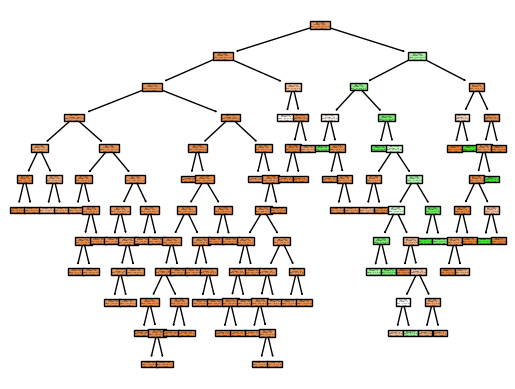

In [35]:
tree.plot_tree(model, feature_names=features, class_names=['length_url', 'nb_qm'], filled=True)